<a href="https://colab.research.google.com/github/HermanMoreno98/Machine_Learning/blob/main/Lab_Santander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Santander Customer Satisfaction
</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Santander Problem</a>  
3. <a href="#item33">Descargar y limpiar el Dataset</a>  
4. <a href="#item34">SMOTE Algorithm</a>  
5. <a href="#item34">Decision Trees</a>  
7. <a href="#item34">Cross Validation y GridSearch</a>  
6. <a href="#item34">Random Forest</a>  
8. <a href="#item34">AdaBoost</a>  
9. <a href="#item34">XGBoost</a>
10. <a href="#item34">RandomSearch</a>
11. <a href="#item34">¿Cómo implementar un modelo?</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir modelos de ensemble.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de ensemble.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [ ]:

# Scikit-Learn
import sklearn
assert sklearn.__version__ >= "0.20"

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Santander Customer Satisfaction


Desde los equipos de soporte de primera línea hasta los ejecutivos, la satisfacción del cliente es una medida clave del éxito de una empresa. Los clientes insatisfechos no se quedan. Es más, los clientes insatisfechos rara vez expresan su insatisfacción antes de irse.

El banco Santander está pidiendo a la comunidad data scientist que los ayude a identificar clientes insatisfechos desde su primera interacción. Hacerlo permitiría a Santander tomar medidas proactivas para mejorar la felicidad de un cliente antes de que sea demasiado tarde.

En este laboratorio, trabajará con cientos de variables anónimas para predecir si un cliente está satisfecho o insatisfecho con su experiencia bancaria.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/4986/media/santander_custsat_red.png" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué clientes son clientes satisfechos? </div>


<b>Descripción de datos</b>

El data frame de Santander tiene 76,020 filas y 371 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables numéricas. La columna <b>"OBJETIVO"</b> es la variable a predecir. Es igual a uno para clientes insatisfechos y 0 para clientes satisfechos.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente insatisfecho.


---


<strong>Puede consultar este [link](https://www.kaggle.com/c/santander-customer-satisfaction/overview) para leer más sobre la fuente de datos Santander.</strong>


## Descargar y limpiar Dataset


In [ ]:
# Cargar Data
import pandas as pd
pddf = pd.read_csv("/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/Santander/train.csv")
pddf.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
univariate = pddf.describe().transpose().reset_index()

In [ ]:
#Verificando las columnas que empiezan por 'ind_var1'
univariate.loc[univariate['index'].str.startswith('ind_var1')]

,index,count,mean,std,min,25%,50%,75%,max
20,ind_var1_0,76020.0,0.011458,0.106425,0.0,0.0,0.0,0.0,1.0
21,ind_var1,76020.0,0.003762,0.061221,0.0,0.0,0.0,0.0,1.0
30,ind_var12_0,76020.0,0.067522,0.250925,0.0,0.0,0.0,0.0,1.0
31,ind_var12,76020.0,0.045462,0.208316,0.0,0.0,0.0,0.0,1.0
32,ind_var13_0,76020.0,0.052249,0.222531,0.0,0.0,0.0,0.0,1.0
33,ind_var13_corto_0,76020.0,0.042936,0.202714,0.0,0.0,0.0,0.0,1.0
34,ind_var13_corto,76020.0,0.041476,0.199390,0.0,0.0,0.0,0.0,1.0
35,ind_var13_largo_0,76020.0,0.010168,0.100325,0.0,0.0,0.0,0.0,1.0
36,ind_var13_largo,76020.0,0.009997,0.099486,0.0,0.0,0.0,0.0,1.0
37,ind_var13_medio_0,76020.0,0.000026,0.005129,0.0,0.0,0.0,0.0,1.0


In [ ]:
pddf.shape

(76020, 371)

In [ ]:
# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

<Axes: xlabel='TARGET', ylabel='count'>

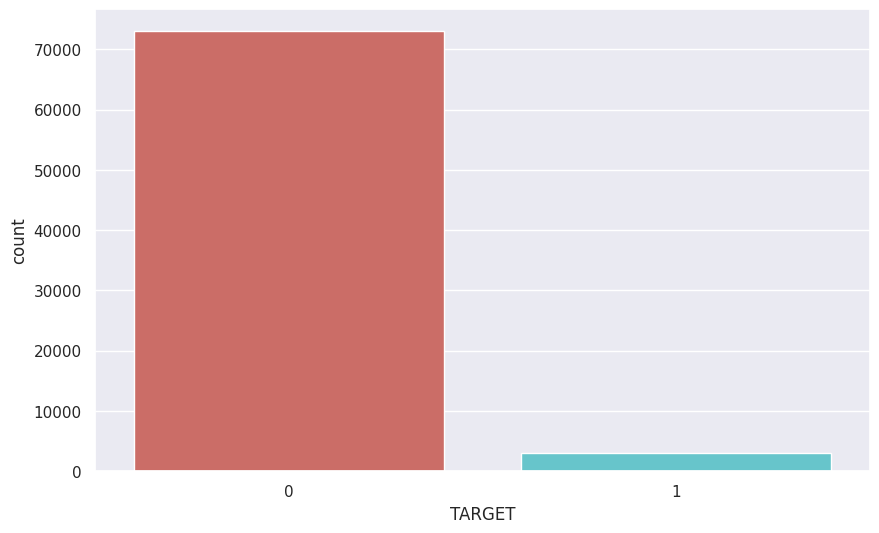

In [ ]:
# Analizando el target
sns.countplot(x = 'TARGET', data = pddf, palette = 'hls')


In [ ]:
pddf.groupby('TARGET')['ID'].count()

TARGET
0    73012
1     3008
Name: ID, dtype: int64

In [ ]:
pddf[['TARGET']].describe()

,TARGET
count,76020.000000
mean,0.039569
std,0.194945
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
# Indentificar las variables

features = list(set(pddf.columns.tolist()) - set(['ID','TARGET']))
features

In [ ]:
# Determinando matrices de datos

X = pddf[features]
y = pddf.TARGET


In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
y_train.mean()

0.039576051415041155

In [ ]:
y_test.mean()

0.03955099535210033

# SMOTE Algorithm


<b>Synthetic Minority Oversampling Technique</b>

Es uno de los métodos de sobremuestreo más utilizados para resolver el problema del desbalanceo.
Su objetivo es equilibrar la distribución de clases aumentando aleatoriamente los ejemplos de clases minoritarias al replicarlos.


SMOTE sintetiza nuevas instancias minoritarias entre instancias minoritarias existentes. Genera los registros de entrenamiento virtual por interpolación lineal para la clase minoritaria. Estos registros de entrenamiento sintéticos se generan seleccionando aleatoriamente uno o más de los k vecinos más cercanos para cada ejemplo en la clase minoritaria. Después del proceso de sobremuestreo, los datos se reconstruyen y se pueden aplicar varios modelos de clasificación para los datos procesados.
¡Más información detallada sobre cómo funciona el algoritmo SMOTE!

<strong>Puede consultar este [link](https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html) para leer más sobre SMOTE.</strong>

<img src="https://i.ytimg.com/vi/U3X98xZ4_no/maxresdefault.jpg" alt="HTML5 Icon" style="width: 400px; height: 250px;">





In [ ]:
pddf.groupby('TARGET')['ID'].count()

TARGET
0    73012
1     3008
Name: ID, dtype: int64

In [ ]:
##### METODOLOGIA DE CLASSWEIGHT

#Para que la informacion del que salio satisfecho, su informacion debe ser tan importante como el que no lo es (1 vs 0)

#Ejm:

# 73012 -> x
# 3008 -> 1

In [ ]:
# Aplicando SMOTE para oversampling

from imblearn.over_sampling import SMOTE


In [ ]:
sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


<Axes: ylabel='count'>

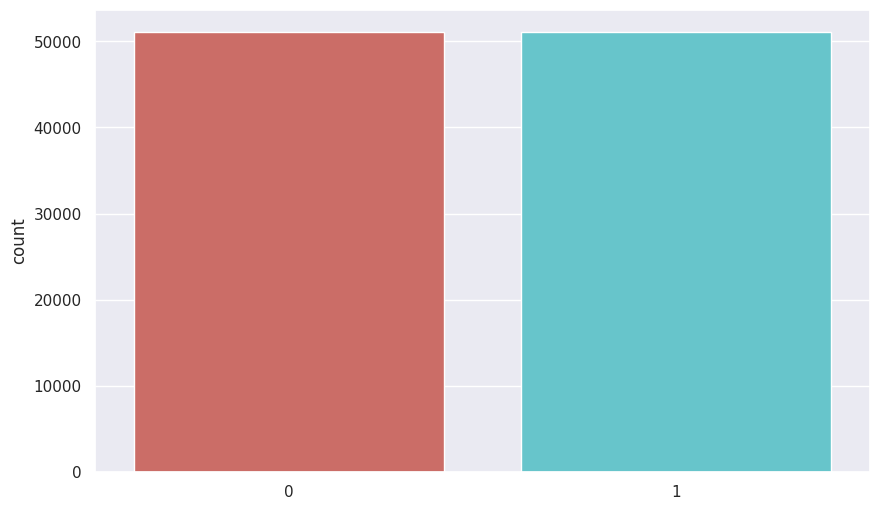

In [ ]:
# Analizando el target
sns.countplot(x = y_train_res, palette = 'hls')

# Decision Tree

In [ ]:
# Cargar librerías

from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5,
                               #class_weight = {0: 1, 1: 25.272},
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)

dtree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.05, random_state=123)

In [ ]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


<b>Bondad de ajuste</b>

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [ ]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_smote = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_smote_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_smote_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_smote

,metric,dTree_smote_train,dTree_smote_test
0,AUC,0.800894,0.799110
1,Gini,0.601789,0.598221
2,Accuracy,0.783309,0.788389
3,Precision,0.112491,0.115143
4,Recall,0.649573,0.650776
5,F1-score,0.191771,0.195667


### balanceo por pesos (CLASS WEIGHT)

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
#Cantidad de ceros
y_train.shape[0] - y_train.sum()

51108

In [ ]:
#Cantidad de unos
y_train.sum()

2106

In [ ]:
#Cada 'Uno' deberia valer 24.26 veces lo que vale un 'cero'
(y_train.shape[0] - y_train.sum())/y_train.sum()

24.267806267806268

In [ ]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5,
                               class_weight = {0: 1, 1: 24.267},
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train, y_train)

dtree

DecisionTreeClassifier(class_weight={0: 1, 1: 24.267}, max_depth=5,
                       min_samples_leaf=0.05, random_state=123)

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [ ]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_w = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_w_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_w_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_w

,metric,dTree_w_train,dTree_w_test
0,AUC,0.820066,0.803175
1,Gini,0.640132,0.606351
2,Accuracy,0.704645,0.707402
3,Precision,0.099323,0.095472
4,Recall,0.801045,0.754989
5,F1-score,0.176732,0.169508


In [ ]:
# Definiendo modelo

dtree_unb = DecisionTreeClassifier(max_depth = 5,
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree_unb = dtree_unb.fit(X_train[features], y_train)

# Usando el modelo para predecir

X_train['probability_unb'] = dtree_unb.predict_proba(X_train[features])[:,1]
X_test['probability_unb']  = dtree_unb.predict_proba(X_test[features])[:,1]

X_train['prediction_unb'] = dtree_unb.predict(X_train[features])
X_test['prediction_unb']  = dtree_unb.predict(X_test[features])

#Resumen de todas las métricas del modelo
metricsDtree_unb = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_unb_train':[roc_auc_score(y_train, X_train.probability_unb),
                                        (roc_auc_score(y_train, X_train.probability_unb)*2-1),
                                        accuracy_score(y_train, X_train.prediction_unb),
                                        precision_score(y_train, X_train.prediction_unb),
                                        recall_score(y_train, X_train.prediction_unb),
                                        f1_score(y_train, X_train.prediction_unb)],

                                'dTree_unb_test':[roc_auc_score(y_test, X_test.probability_unb),
                                        (roc_auc_score(y_test, X_test.probability_unb)*2-1),
                                        accuracy_score(y_test, X_test.prediction_unb),
                                        precision_score(y_test, X_test.prediction_unb),
                                        recall_score(y_test, X_test.prediction_unb),
                                        f1_score(y_test, X_test.prediction_unb)]})


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
temp = pd.merge(metricsDtree_smote, metricsDtree_w, on = ['metric'], how= 'left')
pd.merge(temp, metricsDtree_unb, on = ['metric'], how= 'left')



,metric,dTree_smote_train,dTree_smote_test,dTree_w_train,dTree_w_test,dTree_unb_train,dTree_unb_test
0,AUC,0.800894,0.799110,0.820066,0.803175,0.823127,0.805164
1,Gini,0.601789,0.598221,0.640132,0.606351,0.646253,0.610328
2,Accuracy,0.783309,0.788389,0.704645,0.707402,0.960424,0.960449
3,Precision,0.112491,0.115143,0.099323,0.095472,0.000000,0.000000
4,Recall,0.649573,0.650776,0.801045,0.754989,0.000000,0.000000
5,F1-score,0.191771,0.195667,0.176732,0.169508,0.000000,0.000000


In [ ]:
X_train['TARGET'] = y_train

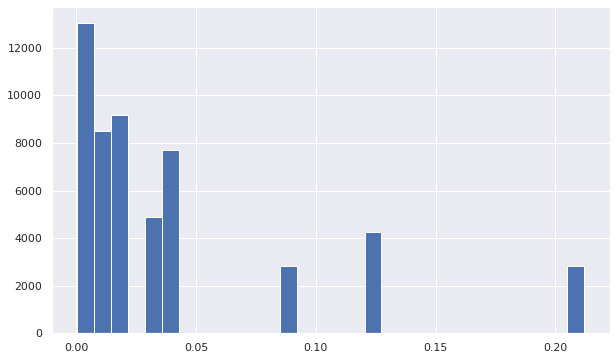

In [ ]:
X_train.probability_unb.hist(bins = 30)

In [ ]:
X_train.loc[X_train.probability_unb < 0.04].TARGET.mean()

0.016576626494897724

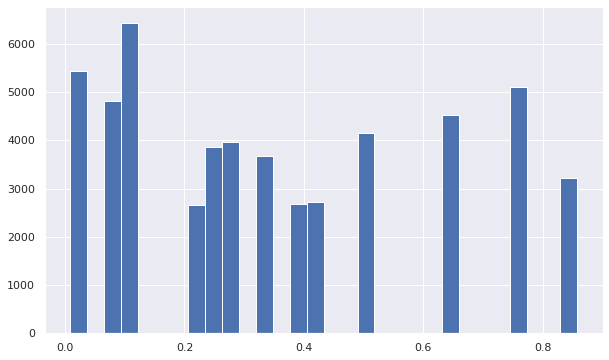

In [ ]:
X_train.probability.hist(bins = 30)

In [ ]:
X_train.loc[X_train.probability < 0.04].TARGET.mean()

0.0007365126127784938

# Cross Validation



<b>evaluar el desempeño del estimador</b>

 ---

Aprender los parámetros de una función de predicción y probarlos con los mismos datos es un error metodológico: un modelo que simplemente repetiría las etiquetas de las muestras que acaba de ver tendría una puntuación perfecta, pero no podría predecir nada útil datos no vistos.
Esta situación se llama Overfitting. Para evitarlo, es una práctica común cuando se realiza un modelo de machine learning (supervisado) mantener parte de los datos disponibles como un conjunto de pruebas X_test, y_test.



Al evaluar diferentes configuraciones ("hiperparámetros") para estimadores, todavía existe el riesgo de Overfitting en el conjunto de prueba porque los parámetros se pueden ajustar hasta que el estimador funcione de manera óptima. De esta manera, el conocimiento sobre el conjunto de pruebas puede "filtrarse" en el modelo y las métricas de evaluación ya no informan sobre el desempeño de generalización. Para resolver este problema, se puede presentar otra parte del conjunto de datos como el llamado "conjunto de validación": el entrenamiento continúa en el conjunto de entrenamiento, después de lo cual se realiza la evaluación en el conjunto de validación y cuando el experimento parece tener éxito , la evaluación final se puede realizar en el equipo de prueba.





Sin embargo, al dividir los datos disponibles en tres conjuntos, reducimos drásticamente la cantidad de muestras que se pueden usar para aprender el modelo, y los resultados pueden depender de una elección aleatoria particular para el par de conjuntos (entrenamiento, validación).


Una solución a este problema es un procedimiento llamado validación cruzada. Un conjunto de prueba aún debe mantenerse para la evaluación final, pero el conjunto de validación ya no es necesario al hacer CV. En el enfoque básico, llamado k-fold CV, el conjunto de entrenamiento se divide en k conjuntos más pequeños . Se sigue el siguiente procedimiento para cada uno de los k "folds":







1.   Se entrena un modelo utilizando los folds como datos de entrenamiento

2.   El modelo resultante se valida en la parte restante de los datos (es decir, se utiliza como un conjunto de prueba para calcular una medida de rendimiento como la precisión)


<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="HTML5 Icon" style="width: 400px; height: 250px;">

---

La medida de rendimiento informada por la validación cruzada de k veces es el promedio de los valores calculados en el ciclo. Este enfoque puede ser computacionalmente costoso, pero no desperdicia demasiados datos (como es el caso cuando se fija un conjunto de validación arbitrario), lo cual es una gran ventaja en problemas como la inferencia inversa donde el número de muestras es muy pequeño.

---


<strong>Puede consultar este [link](https://scikit-learn.org/stable/modules/cross_validation.html) para leer más sobre CrossValidation.</strong>







In [ ]:
# Cargar librerías para grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *


In [ ]:
# Definiendo los parámetros a probar

parameters = {'max_depth': [x for x in range(2,13)],
              'min_samples_leaf' : np.array([0.01, 0.025, 0.05, 0.1, 0.2])}


In [ ]:
# Definiendo modelo

dtree = DecisionTreeClassifier(random_state = 123)


In [ ]:
#Hay 11 posibles combinaciones de modelos por 5 (11*5=55 arboles)
#Luego esto se realiza por cada fold (55*5=275)
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'min_samples_leaf': array([0.01 , 0.025, 0.05 , 0.1  , 0.2  ])}

In [ ]:
# Ejecutando grid search con 5 folds

GridSearch = GridSearchCV(dtree, parameters, cv = 5, verbose = 5, n_jobs = 5,
                          refit = 'AUC',
                          return_train_score = True)

GridSearch.fit(X_train_res, y_train_res.ravel())
#elapsed:  4.6min finished


Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': array([0.01 , 0.025, 0.05 , 0.1  , 0.2  ])},
             refit='AUC', return_train_score=True, verbose=5)

In [ ]:
GridSearch.best_params_

{'max_depth': 8, 'min_samples_leaf': 0.01}

In [ ]:
def plot_search_results(grid):
    """
    Params:
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

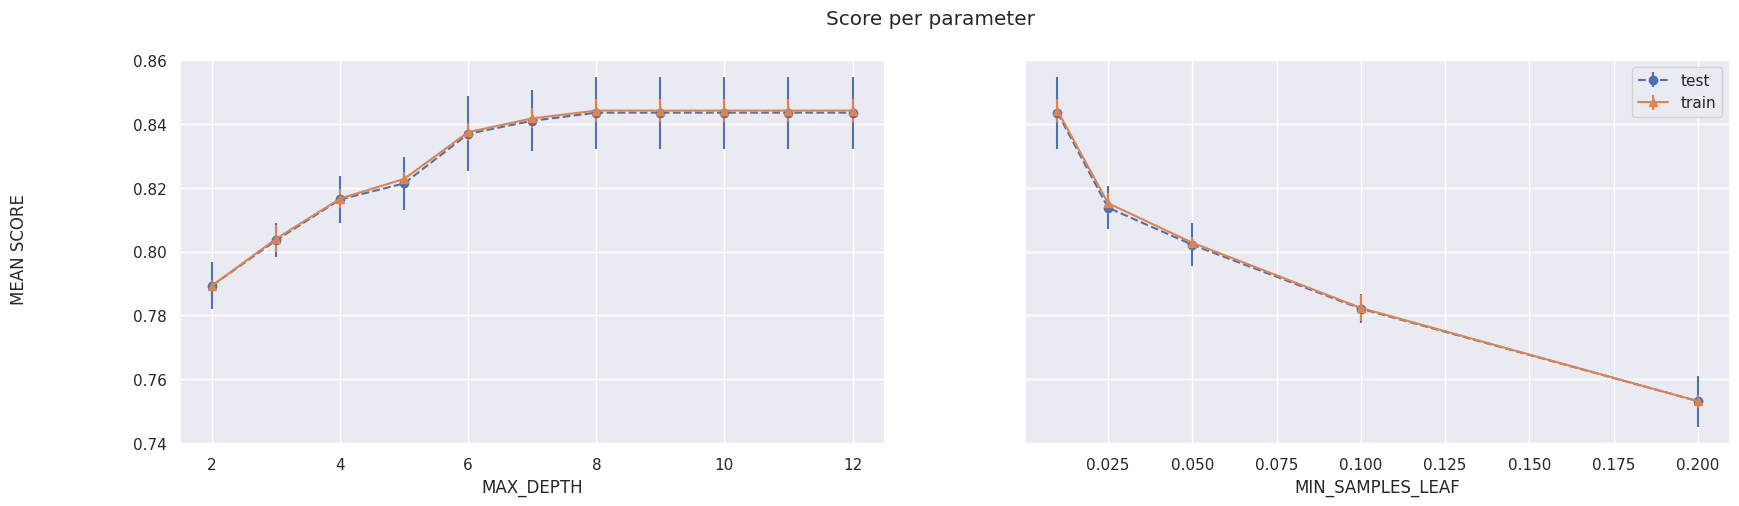

In [ ]:

# Calling Method
plot_search_results(GridSearch)


In [ ]:
# Entrenamiento Óptimizado

dtree = DecisionTreeClassifier(max_depth = 8, #El mejor modelo,
                               min_samples_leaf = 0.01,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)

dtree

DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.01, random_state=123)

In [ ]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)

<b>Bondad de ajuste</b>

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])


In [ ]:
#Resumen de todas las métricas del modelo

metricsDtreeOpt = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtreeOpt

,metric,dTree_train,dTree_test
0,AUC,0.812737,0.799121
1,Gini,0.625474,0.598241
2,Accuracy,0.829744,0.827984
3,Precision,0.137510,0.132392
4,Recall,0.626306,0.603104
5,F1-score,0.225509,0.217122


In [ ]:
pd.merge(metricsDtree_smote, metricsDtreeOpt, on = 'metric', how='left')

,metric,dTree_smote_train,dTree_smote_test,dTree_train,dTree_test
0,AUC,0.800894,0.799110,0.812737,0.799121
1,Gini,0.601789,0.598221,0.625474,0.598241
2,Accuracy,0.783309,0.788389,0.829744,0.827984
3,Precision,0.112491,0.115143,0.137510,0.132392
4,Recall,0.649573,0.650776,0.626306,0.603104
5,F1-score,0.191771,0.195667,0.225509,0.217122


<b>Importancias del modelo</b>

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:

importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : dtree.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
96,ind_var30,0.475042
39,var15,0.271454
105,imp_op_var41_efect_ult3,0.043062
35,var38,0.041179
84,saldo_var42,0.034126
208,saldo_var30,0.031976
20,saldo_var37,0.021082
321,num_var22_ult3,0.019207
157,ind_var37_cte,0.018311
268,num_var22_ult1,0.013307


# Random Forest

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)



In [ ]:
# Cargando librerías

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import time


In [ ]:
# Configurando modelo de random forest

rfc = RandomForestClassifier(n_estimators = 100, #Cantidad de arboles
                             max_depth = 6,
                             min_samples_leaf = 0.01,
                             class_weight = {0: 1, 1: 24.267}, #Balanceo
                             oob_score = True,
                             verbose = 1,
                             n_jobs = 4,
                             random_state = 123)

#oob_score: Out of bagging score, es el desempeño del modelo en la muestra que se
#queda fuera del proceso de extraccion de subespacios de la data
#es importante analizarlo por si el modelo deja fuera algunas caracteristicas importantes de la data

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

4

In [ ]:

start_time = time.time()
rfc = rfc.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished


----4.294656753540039 seconds ---


In [ ]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : rfc.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
39,var15,0.144907
84,saldo_var42,0.065080
335,saldo_medio_var5_hace3,0.059118
208,saldo_var30,0.054372
221,saldo_medio_var5_ult1,0.051993
...,...,...
277,ind_var37_0,0.000022
288,ind_var26,0.000013
230,num_var37_0,0.000010
342,ind_var43_recib_ult1,0.000006


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = rfc.predict_proba(X_train[features])[:,1]
X_test['probability']  = rfc.predict_proba(X_test[features])[:,1]

X_train['prediction'] = rfc.predict(X_train[features])
X_test['prediction']  = rfc.predict(X_test[features])



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
#Resumen de todas las métricas del modelo

metricsRfc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'rfc_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'rfc_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})


metricsRes = pd.merge(metricsDtree_smote, metricsRfc, on = 'metric', how='left')
metricsRes

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test
0,AUC,0.800894,0.799110,0.804409,0.802101
1,Gini,0.601789,0.598221,0.608818,0.604202
2,Accuracy,0.783309,0.788389,0.709644,0.709112
3,Precision,0.112491,0.115143,0.090569,0.090922
4,Recall,0.649573,0.650776,0.700855,0.706208
5,F1-score,0.191771,0.195667,0.160409,0.161103


# AdaBoost

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
# Cargando librerías

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time


In [ ]:
# Configuramos el modelo de adaboost

ada_clf = AdaBoostClassifier(
          DecisionTreeClassifier(max_depth = 1),
          n_estimators = 200,
          algorithm = 'SAMME.R',
          learning_rate = 0.5,
          random_state = 123)


In [ ]:
start_time = time.time()
ada_clf.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


----46.51789593696594 seconds ---


In [ ]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : ada_clf.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
35,var38,0.075
39,var15,0.065
208,saldo_var30,0.050
335,saldo_medio_var5_hace3,0.050
313,imp_op_var39_comer_ult1,0.040
...,...,...
196,num_meses_var13_largo_ult3,0.005
215,num_var5_0,0.005
366,num_meses_var39_vig_ult3,0.005
48,imp_op_var40_efect_ult3,0.005


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = ada_clf.predict_proba(X_train[features])[:,1]
X_test['probability']  = ada_clf.predict_proba(X_test[features])[:,1]

X_train['prediction'] = ada_clf.predict(X_train[features])
X_test['prediction']  = ada_clf.predict(X_test[features])



In [ ]:
#Resumen de todas las métricas del modelo

metricsAdab = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'adab_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'adab_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})


metricsRes = pd.merge(metricsRes, metricsAdab, on = 'metric', how='left')
metricsRes

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test,adab_train,adab_test
0,AUC,0.800894,0.799110,0.804409,0.802101,0.858622,0.821658
1,Gini,0.601789,0.598221,0.608818,0.604202,0.717244,0.643317
2,Accuracy,0.783309,0.788389,0.709644,0.709112,0.960631,0.960405
3,Precision,0.112491,0.115143,0.090569,0.090922,0.720000,0.444444
4,Recall,0.649573,0.650776,0.700855,0.706208,0.008547,0.004435
5,F1-score,0.191771,0.195667,0.160409,0.161103,0.016893,0.008782


# XGBoost

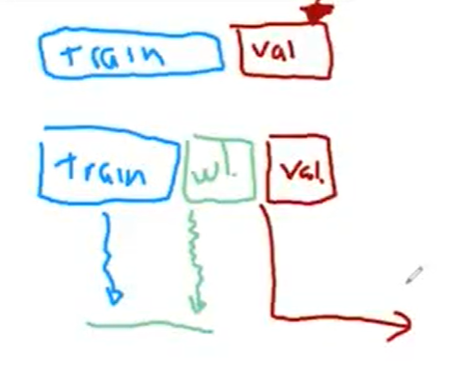

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    train_size = 0.6,
                                                    random_state = 123)

X_watch, X_test, y_watch, y_test = train_test_split(X_test, y_test,
                                                    stratify = y_test,
                                                    train_size = 0.5,
                                                    random_state = 123)

#Al final se tendrá trian (60%), watch list(20%) y validacion(20%)

In [ ]:
# Cargando librerías

import numpy as np
import xgboost as xgb


In [ ]:

dtrain = xgb.DMatrix(X_train, label = y_train)
dwatch = xgb.DMatrix(X_watch, label = y_watch)
dtest  = xgb.DMatrix(X_test, label = y_test)


In [ ]:
# Definiendo parámetros

param = {'objetive' : 'binary_logistic', #target binario, depende el problema / puede ser de regresion, multinomial, etc
         'max_depth' : 8, #Profundidad de cada uno de los arboles
         'learning_rate': 0.05, #Tasa de aprendizaje
         'min_data_leaf' : 0.05, #Minima cantidad de datos en las hojas finales de cada arbol de decision
         'grow_policy' : 'lossguide',
         'seed' : 123}

param['eval_metric'] = 'auc' #Se pueden cambiar por otros indicadores
num_round = 300 #Numero de veces de iteraciones
evallist = [(dtrain,'train'), (dwatch,'watchlist')]



In [ ]:
import time

start_time = time.time()
xgBoost = xgb.train(param, dtrain, num_round, evallist
                   ,early_stopping_rounds = 5) # Si hay 5 veces seguidas caidas de AUC, se detiene el proceso. Es decir, ayuda a controlar el overfitting
print("----%s seconds ---" % ((time.time() - start_time)))


[17:04:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.84292	watchlist-auc:0.80070
[1]	train-auc:0.84437	watchlist-auc:0.80091
[2]	train-auc:0.84804	watchlist-auc:0.80303
[3]	train-auc:0.84918	watchlist-auc:0.80398
[4]	train-auc:0.85069	watchlist-auc:0.80346
[5]	train-auc:0.85591	watchlist-auc:0.80368
[6]	train-auc:0.85652	watchlist-auc:0.80255
[7]	train-auc:0.85795	watchlist-auc:0.80350
[8]	train-auc:0.86178	watchlist-auc:0.80605
[9]	train-auc:0.86270	watchlist-auc:0.80597
[10]	train-auc:0.86426	watchlist-auc:0.80619
[11]	train-auc:0.86508	watchlist-auc:0.80701
[12]	train-auc:0.86617	watchlist-auc:0.80658
[13]	train-auc:0.86799	watchlist-auc:0.80658
[14]	train-auc:0.86898	watchlist-auc:0.80709
[15]	train-auc:0.86958	watchlist-auc:0.80740
[16]	train-auc:0.87063	watchlist-auc:0.80757
[17]	train-auc:0.87222	watchlist-auc:0.81001
[18]	train-auc:0.87352	watchlist-auc:0.81006
[19]	train-auc:0.87425	watchlist-auc:0.81047
[20]	tr

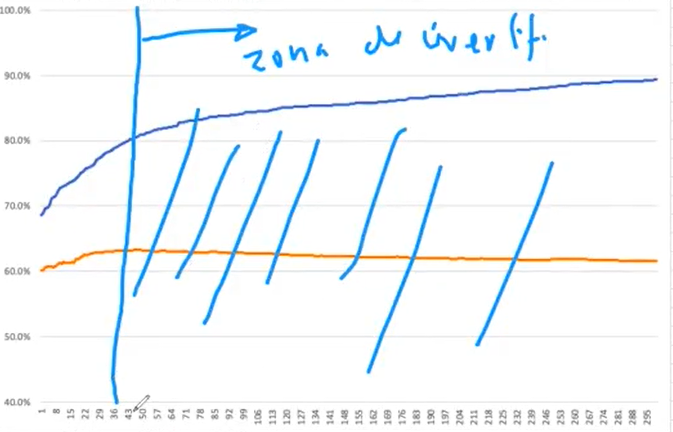

Hay presencia de overfitting. Por ende, se debería correr hasta 36 arboles aprox, en vez de 300

<b>Variables del Modelo</b>

In [ ]:
importance = xgBoost.get_score(importance_type = 'total_gain')
importance

{'ind_var7_recib_ult1': 6.744472980499268,
 'num_var12_0': 13.07734489440918,
 'num_op_var39_comer_ult3': 56.359893798828125,
 'imp_op_var40_ult1': 3.0485782623291016,
 'ind_var32_0': 0.5231503248214722,
 'num_var5': 9.430118560791016,
 'saldo_var1': 0.96417236328125,
 'num_var26_0': 7.898541450500488,
 'num_var42_0': 18.469377517700195,
 'var21': 13.941160202026367,
 'num_meses_var17_ult3': 6.070564270019531,
 'imp_op_var41_comer_ult1': 34.98481369018555,
 'saldo_var37': 42.167232513427734,
 'num_reemb_var13_ult1': 0.3846678137779236,
 'num_var14': 0.7600994110107422,
 'ind_var25_cte': 1.9220257997512817,
 'num_op_var40_efect_ult1': 5.556590557098389,
 'num_op_var41_comer_ult3': 2.4148192405700684,
 'var38': 457.54998779296875,
 'saldo_medio_var5_hace2': 97.60321044921875,
 'var15': 806.108642578125,
 'num_var22_hace2': 49.90019607543945,
 'num_var37_med_ult2': 5.3626275062561035,
 'imp_op_var40_efect_ult1': 7.512001037597656,
 'imp_op_var40_efect_ult3': 0.893341064453125,
 'saldo_var

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

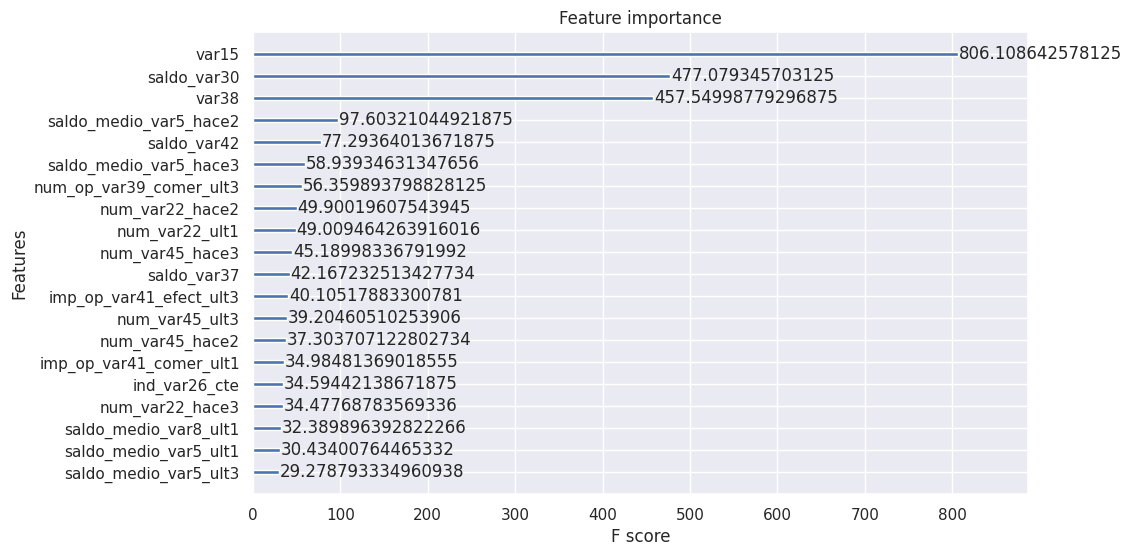

In [ ]:
xgb.plot_importance(xgBoost, max_num_features=20, importance_type = 'total_gain')

In [ ]:
pdVarImp = pd.DataFrame({'Feature': list(importance.keys()),
                         'Importance' : list(importance.values())}).sort_values('Importance', ascending = False)

pdVarImp['C'] = np.arange(len(pdVarImp)) + 1
pdVarImp

,Feature,Importance,C
20,var15,806.108643,1
71,saldo_var30,477.079346,2
18,var38,457.549988,3
19,saldo_medio_var5_hace2,97.603210,4
32,saldo_var42,77.293640,5
...,...,...,...
36,ind_var30,0.316050,105
76,saldo_medio_var13_corto_hace2,0.299179,106
67,num_var25_0,0.197708,107
104,imp_op_var41_comer_ult3,0.144600,108


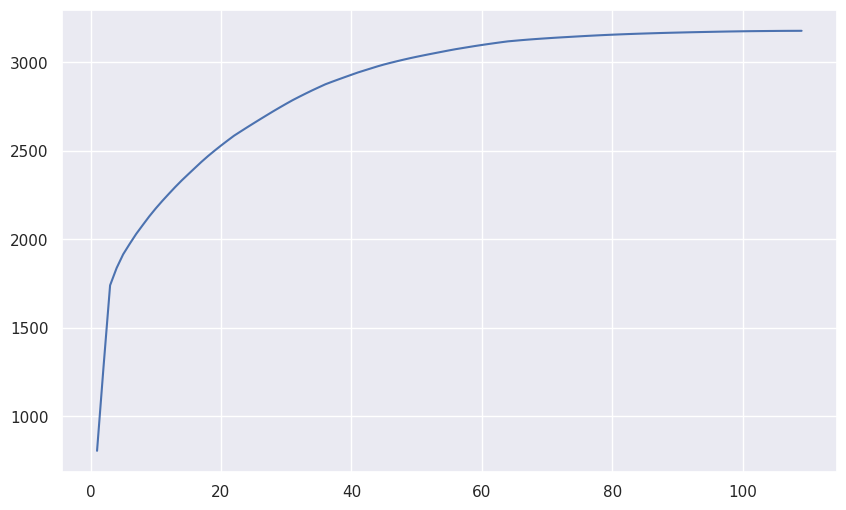

In [ ]:
plt.plot(pdVarImp.C,pdVarImp.Importance.cumsum(axis=0))

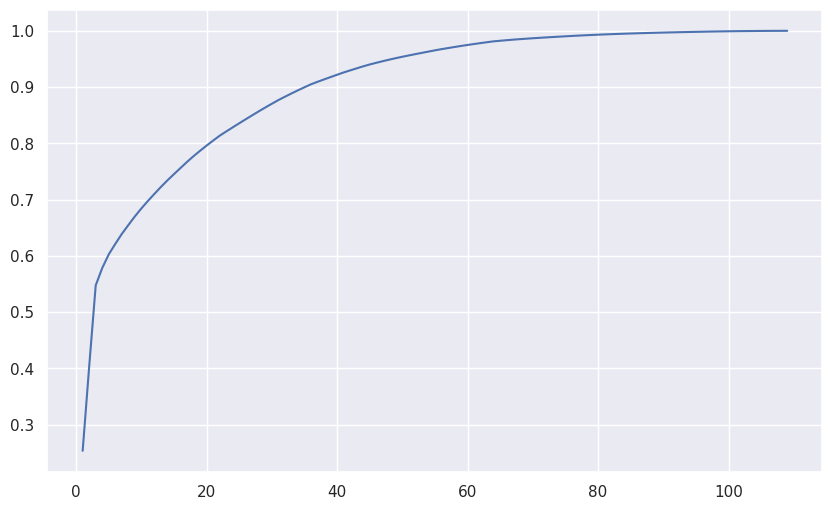

In [ ]:
#Numero de variables segun su porcentaje de importancia del modelo
pdVarImp['porc_gain'] = pdVarImp.Importance.apply(lambda x: x/pdVarImp.Importance.sum())
plt.plot(pdVarImp.C,pdVarImp.porc_gain.cumsum(axis=0))

In [ ]:
pdVarImp['porc_gain_acum'] = pdVarImp.porc_gain.cumsum(axis = 0)


In [ ]:
pdVarImp.transpose()

,20,71,18,19,32,102,2,21,88,47,...,49,4,13,37,48,36,76,67,104,30
Feature,var15,saldo_var30,var38,saldo_medio_var5_hace2,saldo_var42,saldo_medio_var5_hace3,num_op_var39_comer_ult3,num_var22_hace2,num_var22_ult1,num_var45_hace3,...,saldo_medio_var13_corto_ult3,ind_var32_0,num_reemb_var13_ult1,imp_aport_var13_ult1,num_var32_0,ind_var30,saldo_medio_var13_corto_hace2,num_var25_0,imp_op_var41_comer_ult3,num_op_var41_hace3
Importance,806.108643,477.079346,457.549988,97.60321,77.29364,58.939346,56.359894,49.900196,49.009464,45.189983,...,0.560406,0.52315,0.384668,0.341064,0.338497,0.31605,0.299179,0.197708,0.1446,0.134324
C,1,2,3,4,5,6,7,8,9,10,...,100,101,102,103,104,105,106,107,108,109
porc_gain,0.253641,0.150112,0.143968,0.030711,0.02432,0.018545,0.017734,0.015701,0.015421,0.014219,...,0.000176,0.000165,0.000121,0.000107,0.000107,0.000099,0.000094,0.000062,0.000045,0.000042
porc_gain_acum,0.253641,0.403753,0.547721,0.578432,0.602752,0.621297,0.639031,0.654732,0.670153,0.684372,...,0.999157,0.999322,0.999443,0.99955,0.999656,0.999756,0.99985,0.999912,0.999958,1.0


In [ ]:
# Usando el modelo para predecir

X_train['probability']  = xgBoost.predict(xgb.DMatrix(X_train[features], label = y_train))
X_test['probability'] = xgBoost.predict(xgb.DMatrix(X_test[features], label = y_test))

X_train['prediction']  = X_train.probability.apply(lambda x: 1 if x > 0.5 else 0)
X_test['prediction'] = X_test.probability.apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsXGB = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'xgb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'xgb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsXGB
metricsRes = pd.merge(metricsRes, metricsXGB, on = 'metric', how='left')
metricsRes

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test,adab_train,adab_test,xgb_train,xgb_test
0,AUC,0.800894,0.799110,0.804409,0.802101,0.858622,0.821658,0.892555,0.845202
1,Gini,0.601789,0.598221,0.608818,0.604202,0.717244,0.643317,0.785110,0.690403
2,Accuracy,0.783309,0.788389,0.709644,0.709112,0.960631,0.960405,0.962795,0.960208
3,Precision,0.112491,0.115143,0.090569,0.090922,0.720000,0.444444,1.000000,0.333333
4,Recall,0.649573,0.650776,0.700855,0.706208,0.008547,0.004435,0.059834,0.006656
5,F1-score,0.191771,0.195667,0.160409,0.161103,0.016893,0.008782,0.112912,0.013051


¿Como optimizar el modelo? Porque en el modeo enterior, se ve presencia de overfitting, ya que hay mucha diferencia en los indicadores de trian y test

# Random Search

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
# setear valores iniciales

paramGrid = {'objetive' : ['binary_logistic'],
         'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
         'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
         'seed' : [123],
         'max_leaves' : [2, 4, 8],
         'min_data_leaf' : [0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2],
         'grow_policy' : ['lossguide'],
         'min_child_weight' : [1,2,3,4,5,6,7,8,9,10]}

param['eval_metric'] = 'auc'
num_round = 100

pdResults = pd.DataFrame()



In [ ]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest  = xgb.DMatrix(X_test, label = y_test)

In [ ]:
# Iniciar iteración de Hyperparámetros
import random

for i in range(200):
  print("****** Iteration : " + str(i))
  param = {}
  for paramName, paramValue in paramGrid.items():
    param[paramName] = random.choice(paramValue)
  param['eval_metric' ] = 'auc'
  evallist = [(dtrain,'train'),(dtest,'valid')]
  num_round = 10

  bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval = 5)

  y_train_pred = bst.predict(dtrain)
  y_test_pred = bst.predict(dtest)

  giniTrain = ((roc_auc_score(y_train, y_train_pred) - 0.5)*200)
  giniTest =  ((roc_auc_score(y_test, y_test_pred) - 0.5)*200)

  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
                                             'paramName': list(param.keys()),
                                             'paramValue': list(param.values()),
                                             'giniTrain' : giniTrain,
                                             'giniTest' : giniTest}))

  pdResults.to_csv('HyperParamSearch.csv', index = False)

****** Iteration : 0
[17:18:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84448	valid-auc:0.81066
[5]	train-auc:0.84813	valid-auc:0.81310
[9]	train-auc:0.84959	valid-auc:0.81384
****** Iteration : 1
[17:18:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84735	valid-auc:0.80975
[5]	train-auc:0.85374	valid-auc:0.81460
[9]	train-auc:0.85798	valid-auc:0.81604
****** Iteration : 2


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[17:18:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.85635	valid-auc:0.81079
[5]	train-auc:0.90172	valid-auc:0.81773
[9]	train-auc:0.92645	valid-auc:0.81937
****** Iteration : 3
[17:18:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83976	valid-auc:0.81413
[5]	train-auc:0.85410	valid-auc:0.82430
[9]	train-auc:0.85901	valid-auc:0.82757
****** Iteration : 4
[17:18:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82079	valid-auc:0.79939
[5]	train-auc:0.84018	valid-auc:0.81895
[9]	train-auc:0.84389	valid-auc:0.82446
****** Iteration : 5
[17:18:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83499	valid-auc:0.80953
[5]	train-auc:0.84821	valid-auc:0.81998
[9]	train-auc:0.85309	valid-auc:0.82121
****** Iteration : 6
[17:18:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84273	valid-auc:0.81118
[5]	train-auc:0.84755	valid-auc:0.81502
[9]	train-auc:0.84992	valid-auc:0.81598
****** Iteration : 7
[17:18:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85581	valid-auc:0.80746
[5]	train-auc:0.87682	valid-auc:0.81983
[9]	train-auc:0.88534	valid-auc:0.82504
****** Iteration : 8
[17:18:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83511	valid-auc:0.80788
[5]	train-auc:0.85824	valid-auc:0.82442
[9]	train-auc:0.86687	valid-auc:0.82849
****** Iteration : 9
[17:19:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86932	valid-auc:0.79683
[5]	train-auc:0.87939	valid-auc:0.80297
[9]	train-auc:0.88471	valid-auc:0.80824
****** Iteration : 10
[17:19:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83179	valid-auc:0.80831
[5]	train-auc:0.83384	valid-auc:0.81022
[9]	train-auc:0.83384	valid-auc:0.81071
****** Iteration : 11
[17:19:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85635	valid-auc:0.81079
[5]	train-auc:0.88657	valid-auc:0.81930
[9]	train-auc:0.89915	valid-auc:0.82298
****** Iteration : 12
[17:19:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81925	valid-auc:0.80282
[9]	train-auc:0.82847	valid-auc:0.81592
****** Iteration : 13
[17:19:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84619	valid-auc:0.81248
[5]	train-auc:0.85015	valid-auc:0.81542
[9]	train-auc:0.85213	valid-auc:0.81502
****** Iteration : 14
[17:19:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81777	valid-auc:0.79589
[5]	train-auc:0.84198	valid-auc:0.81981
[9]	train-auc:0.84984	valid-auc:0.82650
****** Iteration : 15
[17:19:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80662	valid-auc:0.78658


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80922	valid-auc:0.78947
[9]	train-auc:0.81283	valid-auc:0.79334
****** Iteration : 16
[17:19:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81777	valid-auc:0.79589
[5]	train-auc:0.82495	valid-auc:0.80263
[9]	train-auc:0.82928	valid-auc:0.80649
****** Iteration : 17
[17:19:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85411	valid-auc:0.80671
[5]	train-auc:0.86046	valid-auc:0.81122
[9]	train-auc:0.86417	valid-auc:0.81478
****** Iteration : 18
[17:19:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82082	valid-auc:0.79939
[5]	train-auc:0.83200	valid-auc:0.80846
[9]	train-auc:0.83942	valid-auc:0.81656
****** Iteration : 19
[17:19:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86928	valid-auc:0.79565
[5]	train-auc:0.87597	valid-auc:0.80128
[9]	train-auc:0.88387	valid-auc:0.80681
****** Iteration : 20
[17:20:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83179	valid-auc:0.80840
[5]	train-auc:0.84043	valid-auc:0.81604
[9]	train-auc:0.84344	valid-auc:0.81802
****** Iteration : 21
[17:20:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86928	valid-auc:0.79565
[5]	train-auc:0.90815	valid-auc:0.81483
[9]	train-auc:0.92233	valid-auc:0.80780


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


****** Iteration : 22
[17:20:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.81635	valid-auc:0.79462
[5]	train-auc:0.83927	valid-auc:0.81836
[9]	train-auc:0.84311	valid-auc:0.82123
****** Iteration : 23
[17:20:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84438	valid-auc:0.81104
[5]	train-auc:0.85588	valid-auc:0.81847
[9]	train-auc:0.86231	valid-auc:0.82148
****** Iteration : 24
[17:20:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77631	valid-auc:0.76584
[9]	train-auc:0.77631	valid-auc:0.76584
****** Iteration : 25
[17:20:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83179	valid-auc:0.80840
[5]	train-auc:0.84043	valid-auc:0.81604
[9]	train-auc:0.84344	valid-auc:0.81802
****** Iteration : 26
[17:20:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85406	valid-auc:0.80657
[5]	train-auc:0.87721	valid-auc:0.82264
[9]	train-auc:0.88611	valid-auc:0.82339
****** Iteration : 27
[17:20:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86305	valid-auc:0.80853
[5]	train-auc:0.87923	valid-auc:0.81284
[9]	train-auc:0.89060	valid-auc:0.81631
****** Iteration : 28
[17:20:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82079	valid-auc:0.79939
[5]	train-auc:0.83217	valid-auc:0.80926
[9]	train-auc:0.83946	valid-auc:0.81788
****** Iteration : 29
[17:20:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84667	valid-auc:0.81155
[5]	train-auc:0.86838	valid-auc:0.81981
[9]	train-auc:0.87521	valid-auc:0.82464
****** Iteration : 30
[17:20:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80639	valid-auc:0.78770


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.82025	valid-auc:0.80371
[9]	train-auc:0.82472	valid-auc:0.80808
****** Iteration : 31
[17:20:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83511	valid-auc:0.80788
[5]	train-auc:0.84419	valid-auc:0.81547
[9]	train-auc:0.84840	valid-auc:0.81906
****** Iteration : 32
[17:20:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83879	valid-auc:0.81369
[5]	train-auc:0.84434	valid-auc:0.81702
[9]	train-auc:0.84756	valid-auc:0.81940
****** Iteration : 33
[17:21:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86667	valid-auc:0.79750
[5]	train-auc:0.87349	valid-auc:0.80278
[9]	train-auc:0.87581	valid-auc:0.80438
****** Iteration : 34
[17:21:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86088	valid-auc:0.80556
[5]	train-auc:0.89401	valid-auc:0.81965
[9]	train-auc:0.90798	valid-auc:0.81578
****** Iteration : 35
[17:21:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80647	valid-auc:0.78681


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80904	valid-auc:0.78970
[9]	train-auc:0.81266	valid-auc:0.79357
****** Iteration : 36
[17:21:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86305	valid-auc:0.80853
[5]	train-auc:0.87923	valid-auc:0.81284
[9]	train-auc:0.89060	valid-auc:0.81631
****** Iteration : 37
[17:21:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85222	valid-auc:0.81230
[5]	train-auc:0.85847	valid-auc:0.81469
[9]	train-auc:0.86137	valid-auc:0.81565
****** Iteration : 38
[17:21:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86305	valid-auc:0.80853
[5]	train-auc:0.86526	valid-auc:0.81019
[9]	train-auc:0.86650	valid-auc:0.81092
****** Iteration : 39
[17:21:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84143	valid-auc:0.81108
[5]	train-auc:0.84686	valid-auc:0.81544
[9]	train-auc:0.85078	valid-auc:0.81761
****** Iteration : 40
[17:21:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83511	valid-auc:0.80788
[5]	train-auc:0.84419	valid-auc:0.81547
[9]	train-auc:0.84840	valid-auc:0.81906
****** Iteration : 41
[17:21:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83170	valid-auc:0.80837
[5]	train-auc:0.83965	valid-auc:0.81523
[9]	train-auc:0.84213	valid-auc:0.81671
****** Iteration : 42
[17:22:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80647	valid-auc:0.78681
[5]	train-auc:0.80904	valid-auc:0.78970
[9]	train-auc:0.81266	valid-auc:0.79357
****** Iteration : 43
[17:22:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83170	valid-auc:0.80837
[5]	train-auc:0.83295	valid-auc:0.80976
[9]	train-auc:0.83291	valid-auc:0.80989
****** Iteration : 44
[17:22:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85927	valid-auc:0.80176
[5]	train-auc:0.88265	valid-auc:0.82189
[9]	train-auc:0.89149	valid-auc:0.82074
****** Iteration : 45
[17:22:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85885	valid-auc:0.80553
[5]	train-auc:0.86874	valid-auc:0.80913
[9]	train-auc:0.87303	valid-auc:0.81302
****** Iteration : 46
[17:22:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85635	valid-auc:0.81079
[5]	train-auc:0.88657	valid-auc:0.81930
[9]	train-auc:0.89915	valid-auc:0.82298
****** Iteration : 47
[17:22:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80643	valid-auc:0.78681


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80891	valid-auc:0.78950
[9]	train-auc:0.81254	valid-auc:0.79340
****** Iteration : 48
[17:22:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83294	valid-auc:0.80909
[5]	train-auc:0.84425	valid-auc:0.81737
[9]	train-auc:0.85068	valid-auc:0.82333
****** Iteration : 49
[17:22:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.87002	valid-auc:0.79723
[5]	train-auc:0.88708	valid-auc:0.80765
[9]	train-auc:0.89511	valid-auc:0.81341
****** Iteration : 50
[17:22:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82048	valid-auc:0.79949
[5]	train-auc:0.82562	valid-auc:0.80344
[9]	train-auc:0.82947	valid-auc:0.80737
****** Iteration : 51
[17:22:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82040	valid-auc:0.79848
[5]	train-auc:0.83195	valid-auc:0.80884
[9]	train-auc:0.83927	valid-auc:0.81662
****** Iteration : 52
[17:22:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84269	valid-auc:0.81081
[5]	train-auc:0.86167	valid-auc:0.82275
[9]	train-auc:0.86761	valid-auc:0.82645
****** Iteration : 53
[17:23:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83870	valid-auc:0.81350
[5]	train-auc:0.85089	valid-auc:0.82217
[9]	train-auc:0.85345	valid-auc:0.82347
****** Iteration : 54
[17:23:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81925	valid-auc:0.80282
[9]	train-auc:0.82855	valid-auc:0.81579
****** Iteration : 55
[17:23:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80643	valid-auc:0.78681
[5]	train-auc:0.80891	valid-auc:0.78950
[9]	train-auc:0.81254	valid-auc:0.79340
****** Iteration : 56
[17:23:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86932	valid-auc:0.79683
[5]	train-auc:0.87571	valid-auc:0.80121
[9]	train-auc:0.87893	valid-auc:0.80206
****** Iteration : 57
[17:23:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81635	valid-auc:0.79462
[5]	train-auc:0.84094	valid-auc:0.81735
[9]	train-auc:0.84937	valid-auc:0.82425
****** Iteration : 58
[17:23:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83976	valid-auc:0.81413
[5]	train-auc:0.84471	valid-auc:0.81731
[9]	train-auc:0.84790	valid-auc:0.81976
****** Iteration : 59
[17:23:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78331	valid-auc:0.77223
[9]	train-auc:0.78380	valid-auc:0.77468
****** Iteration : 60
[17:23:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86692	valid-auc:0.79787
[5]	train-auc:0.87260	valid-auc:0.80061
[9]	train-auc:0.87535	valid-auc:0.80394
****** Iteration : 61
[17:23:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83173	valid-auc:0.80919
[5]	train-auc:0.83340	valid-auc:0.81120
[9]	train-auc:0.83818	valid-auc:0.81517
****** Iteration : 62
[17:23:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83179	valid-auc:0.80831
[5]	train-auc:0.83383	valid-auc:0.81054
[9]	train-auc:0.83905	valid-auc:0.81496
****** Iteration : 63
[17:23:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85480	valid-auc:0.81115
[5]	train-auc:0.87967	valid-auc:0.81932
[9]	train-auc:0.89154	valid-auc:0.82244
****** Iteration : 64
[17:23:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83170	valid-auc:0.80837
[5]	train-auc:0.84325	valid-auc:0.81776
[9]	train-auc:0.85029	valid-auc:0.82307
****** Iteration : 65
[17:23:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77631	valid-auc:0.76584
[9]	train-auc:0.77631	valid-auc:0.76584
****** Iteration : 66
[17:23:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83870	valid-auc:0.81350
[5]	train-auc:0.84365	valid-auc:0.81634
[9]	train-auc:0.84736	valid-auc:0.81855
****** Iteration : 67
[17:24:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78406	valid-auc:0.77659
[9]	train-auc:0.81792	valid-auc:0.80230
****** Iteration : 68
[17:24:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81641	valid-auc:0.79462
[5]	train-auc:0.82963	valid-auc:0.80836
[9]	train-auc:0.83539	valid-auc:0.81400
****** Iteration : 69
[17:24:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86497	valid-auc:0.80261
[5]	train-auc:0.87160	valid-auc:0.80941
[9]	train-auc:0.87868	valid-auc:0.81146
****** Iteration : 70
[17:24:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83870	valid-auc:0.81350
[5]	train-auc:0.84263	valid-auc:0.81604
[9]	train-auc:0.84365	valid-auc:0.81640
****** Iteration : 71
[17:24:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86465	valid-auc:0.79832
[5]	train-auc:0.88254	valid-auc:0.81244
[9]	train-auc:0.89109	valid-auc:0.82050
****** Iteration : 72
[17:24:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84273	valid-auc:0.81118
[5]	train-auc:0.86141	valid-auc:0.82381
[9]	train-auc:0.86751	valid-auc:0.82688
****** Iteration : 73
[17:24:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84415	valid-auc:0.81108
[5]	train-auc:0.86117	valid-auc:0.82009
[9]	train-auc:0.86711	valid-auc:0.82550
****** Iteration : 74
[17:24:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84273	valid-auc:0.81118
[5]	train-auc:0.86141	valid-auc:0.82381
[9]	train-auc:0.86751	valid-auc:0.82688
****** Iteration : 75
[17:24:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85885	valid-auc:0.80553
[5]	train-auc:0.89335	valid-auc:0.82206
[9]	train-auc:0.90414	valid-auc:0.82662
****** Iteration : 76
[17:24:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83870	valid-auc:0.81350
[5]	train-auc:0.84365	valid-auc:0.81634
[9]	train-auc:0.84736	valid-auc:0.81855
****** Iteration : 77
[17:24:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84735	valid-auc:0.80975
[5]	train-auc:0.87047	valid-auc:0.82251
[9]	train-auc:0.87905	valid-auc:0.82574
****** Iteration : 78
[17:25:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78406	valid-auc:0.77659
[9]	train-auc:0.81792	valid-auc:0.80230
****** Iteration : 79
[17:25:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84273	valid-auc:0.81118
[5]	train-auc:0.84755	valid-auc:0.81502
[9]	train-auc:0.84992	valid-auc:0.81598
****** Iteration : 80
[17:25:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84931	valid-auc:0.80997
[5]	train-auc:0.87062	valid-auc:0.81999
[9]	train-auc:0.87734	valid-auc:0.82338
****** Iteration : 81
[17:25:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83185	valid-auc:0.80828
[5]	train-auc:0.84554	valid-auc:0.81922
[9]	train-auc:0.85246	valid-auc:0.82528
****** Iteration : 82
[17:25:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86096	valid-auc:0.80630
[5]	train-auc:0.87462	valid-auc:0.81348
[9]	train-auc:0.88321	valid-auc:0.81885
****** Iteration : 83
[17:25:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83185	valid-auc:0.80828
[5]	train-auc:0.85024	valid-auc:0.82173
[9]	train-auc:0.85798	valid-auc:0.82527
****** Iteration : 84
[17:25:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83702	valid-auc:0.81036
[5]	train-auc:0.84379	valid-auc:0.81612
[9]	train-auc:0.84780	valid-auc:0.81848
****** Iteration : 85
[17:25:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85507	valid-auc:0.81003
[5]	train-auc:0.86107	valid-auc:0.81245
[9]	train-auc:0.86421	valid-auc:0.81257
****** Iteration : 86
[17:25:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77478	valid-auc:0.76484
[9]	train-auc:0.77478	valid-auc:0.76484
****** Iteration : 87
[17:25:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83870	valid-auc:0.81350
[5]	train-auc:0.85979	valid-auc:0.82302
[9]	train-auc:0.86847	valid-auc:0.82871
****** Iteration : 88
[17:25:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81925	valid-auc:0.80282
[9]	train-auc:0.82855	valid-auc:0.81579
****** Iteration : 89
[17:25:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84409	valid-auc:0.81097
[5]	train-auc:0.85546	valid-auc:0.81884
[9]	train-auc:0.86206	valid-auc:0.82218
****** Iteration : 90
[17:25:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85963	valid-auc:0.80208
[5]	train-auc:0.87355	valid-auc:0.81539
[9]	train-auc:0.88256	valid-auc:0.82086
****** Iteration : 91
[17:26:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83702	valid-auc:0.81036
[5]	train-auc:0.86058	valid-auc:0.82504
[9]	train-auc:0.86811	valid-auc:0.82786
****** Iteration : 92
[17:26:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80662	valid-auc:0.78658


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81577	valid-auc:0.79641
[9]	train-auc:0.81825	valid-auc:0.80026
****** Iteration : 93
[17:26:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83294	valid-auc:0.80909
[5]	train-auc:0.85063	valid-auc:0.82194
[9]	train-auc:0.85882	valid-auc:0.82796
****** Iteration : 94
[17:26:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80662	valid-auc:0.78658


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83196	valid-auc:0.81673
[9]	train-auc:0.84010	valid-auc:0.82191
****** Iteration : 95
[17:26:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84619	valid-auc:0.81248
[5]	train-auc:0.85268	valid-auc:0.81431
[9]	train-auc:0.85619	valid-auc:0.81615
****** Iteration : 96
[17:26:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77631	valid-auc:0.76584
[9]	train-auc:0.77631	valid-auc:0.76584
****** Iteration : 97
[17:26:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83179	valid-auc:0.80831
[5]	train-auc:0.83390	valid-auc:0.81079
[9]	train-auc:0.83941	valid-auc:0.81571
****** Iteration : 98
[17:26:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81777	valid-auc:0.79589
[5]	train-auc:0.82059	valid-auc:0.79851
[9]	train-auc:0.82434	valid-auc:0.80219
****** Iteration : 99
[17:26:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83294	valid-auc:0.80909
[5]	train-auc:0.84222	valid-auc:0.81559
[9]	train-auc:0.84544	valid-auc:0.82000
****** Iteration : 100
[17:26:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78406	valid-auc:0.77659
[9]	train-auc:0.81792	valid-auc:0.80230
****** Iteration : 101
[17:26:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86565	valid-auc:0.79917
[5]	train-auc:0.87187	valid-auc:0.80442
[9]	train-auc:0.87722	valid-auc:0.80805
****** Iteration : 102
[17:26:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85581	valid-auc:0.80746
[5]	train-auc:0.86876	valid-auc:0.81392
[9]	train-auc:0.87637	valid-auc:0.81947
****** Iteration : 103
[17:26:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84269	valid-auc:0.81081
[5]	train-auc:0.86597	valid-auc:0.82495
[9]	train-auc:0.87485	valid-auc:0.82689
****** Iteration : 104
[17:26:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82079	valid-auc:0.79939
[5]	train-auc:0.82176	valid-auc:0.79926
[9]	train-auc:0.82551	valid-auc:0.80299
****** Iteration : 105
[17:27:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86631	valid-auc:0.79916
[5]	train-auc:0.87209	valid-auc:0.80317
[9]	train-auc:0.87451	valid-auc:0.80477
****** Iteration : 106
[17:27:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83996	valid-auc:0.81408
[5]	train-auc:0.85906	valid-auc:0.82556
[9]	train-auc:0.86753	valid-auc:0.82868
****** Iteration : 107
[17:27:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84273	valid-auc:0.81118
[5]	train-auc:0.84999	valid-auc:0.81603
[9]	train-auc:0.85296	valid-auc:0.81778
****** Iteration : 108
[17:27:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85635	valid-auc:0.81079
[5]	train-auc:0.86231	valid-auc:0.81386
[9]	train-auc:0.86599	valid-auc:0.81438
****** Iteration : 109
[17:27:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80662	valid-auc:0.78658
[5]	train-auc:0.80922	valid-auc:0.78947
[9]	train-auc:0.81283	valid-auc:0.79334
****** Iteration : 110
[17:27:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83173	valid-auc:0.80919
[5]	train-auc:0.84490	valid-auc:0.81942
[9]	train-auc:0.85082	valid-auc:0.82476
****** Iteration : 111
[17:27:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81771	valid-auc:0.79678
[5]	train-auc:0.82082	valid-auc:0.79920
[9]	train-auc:0.82459	valid-auc:0.80270
****** Iteration : 112
[17:27:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80662	valid-auc:0.78658
[5]	train-auc:0.81577	valid-auc:0.79641
[9]	train-auc:0.81825	valid-auc:0.80026
****** Iteration : 113
[17:27:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85605	valid-auc:0.80911
[5]	train-auc:0.86953	valid-auc:0.81397
[9]	train-auc:0.88082	valid-auc:0.81824
****** Iteration : 114
[17:27:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80641	valid-auc:0.78676
[5]	train-auc:0.82546	valid-auc:0.80859
[9]	train-auc:0.83286	valid-auc:0.81714
****** Iteration : 115
[17:27:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85406	valid-auc:0.80657
[5]	train-auc:0.86221	valid-auc:0.81098
[9]	train-auc:0.86539	valid-auc:0.81397
****** Iteration : 116
[17:28:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84415	valid-auc:0.81108
[5]	train-auc:0.85581	valid-auc:0.81770
[9]	train-auc:0.86145	valid-auc:0.82134
****** Iteration : 117
[17:28:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83185	valid-auc:0.80828
[5]	train-auc:0.83446	valid-auc:0.81057
[9]	train-auc:0.83440	valid-auc:0.81112
****** Iteration : 118
[17:28:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83176	valid-auc:0.80838
[5]	train-auc:0.84905	valid-auc:0.82233
[9]	train-auc:0.85671	valid-auc:0.82534
****** Iteration : 119
[17:28:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85662	valid-auc:0.80873
[5]	train-auc:0.89377	valid-auc:0.82227
[9]	train-auc:0.91047	valid-auc:0.82483
****** Iteration : 120
[17:28:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84438	valid-auc:0.81104
[5]	train-auc:0.85588	valid-auc:0.81847
[9]	train-auc:0.86231	valid-auc:0.82148
****** Iteration : 121
[17:28:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78406	valid-auc:0.77659
[9]	train-auc:0.81792	valid-auc:0.80230
****** Iteration : 122
[17:28:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84767	valid-auc:0.80934
[5]	train-auc:0.85543	valid-auc:0.81450
[9]	train-auc:0.85860	valid-auc:0.81552
****** Iteration : 123
[17:28:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83294	valid-auc:0.80909
[5]	train-auc:0.83465	valid-auc:0.81088
[9]	train-auc:0.83951	valid-auc:0.81522
****** Iteration : 124
[17:28:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85133	valid-auc:0.81139
[5]	train-auc:0.86400	valid-auc:0.81458
[9]	train-auc:0.87366	valid-auc:0.81918
****** Iteration : 125
[17:28:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83499	valid-auc:0.80953
[5]	train-auc:0.85992	valid-auc:0.82671
[9]	train-auc:0.86786	valid-auc:0.82889
****** Iteration : 126
[17:28:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84200	valid-auc:0.80987
[5]	train-auc:0.86572	valid-auc:0.82470
[9]	train-auc:0.87707	valid-auc:0.82644
****** Iteration : 127
[17:28:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84767	valid-auc:0.80934
[5]	train-auc:0.87675	valid-auc:0.82520
[9]	train-auc:0.88584	valid-auc:0.82972
****** Iteration : 128
[17:28:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84619	valid-auc:0.81248
[5]	train-auc:0.87532	valid-auc:0.82318
[9]	train-auc:0.88741	valid-auc:0.82775
****** Iteration : 129
[17:29:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86167	valid-auc:0.80344
[5]	train-auc:0.87706	valid-auc:0.81422
[9]	train-auc:0.88655	valid-auc:0.81845
****** Iteration : 130
[17:29:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86421	valid-auc:0.79872
[5]	train-auc:0.89069	valid-auc:0.81453
[9]	train-auc:0.90198	valid-auc:0.81863
****** Iteration : 131
[17:29:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84931	valid-auc:0.80997
[5]	train-auc:0.85479	valid-auc:0.81385
[9]	train-auc:0.85876	valid-auc:0.81463
****** Iteration : 132
[17:29:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83522	valid-auc:0.80873
[5]	train-auc:0.84218	valid-auc:0.81474
[9]	train-auc:0.84296	valid-auc:0.81520
****** Iteration : 133
[17:29:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85605	valid-auc:0.80911
[5]	train-auc:0.85914	valid-auc:0.81171
[9]	train-auc:0.86068	valid-auc:0.81224
****** Iteration : 134
[17:29:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83170	valid-auc:0.80837
[5]	train-auc:0.83295	valid-auc:0.80976
[9]	train-auc:0.83291	valid-auc:0.80989
****** Iteration : 135
[17:29:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78331	valid-auc:0.77223
[9]	train-auc:0.78380	valid-auc:0.77468
****** Iteration : 136
[17:29:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86421	valid-auc:0.79872
[5]	train-auc:0.86919	valid-auc:0.80195
[9]	train-auc:0.87164	valid-auc:0.80300
****** Iteration : 137
[17:29:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80647	valid-auc:0.78681
[5]	train-auc:0.80904	valid-auc:0.78970
[9]	train-auc:0.81266	valid-auc:0.79357
****** Iteration : 138
[17:29:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86497	valid-auc:0.80261
[5]	train-auc:0.86795	valid-auc:0.80953
[9]	train-auc:0.86915	valid-auc:0.80986
****** Iteration : 139
[17:30:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83179	valid-auc:0.80831
[5]	train-auc:0.83390	valid-auc:0.81079
[9]	train-auc:0.83941	valid-auc:0.81571
****** Iteration : 140
[17:30:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85963	valid-auc:0.80208
[5]	train-auc:0.88256	valid-auc:0.81955
[9]	train-auc:0.89462	valid-auc:0.82409
****** Iteration : 141
[17:30:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86928	valid-auc:0.79565
[5]	train-auc:0.87307	valid-auc:0.80003
[9]	train-auc:0.87528	valid-auc:0.80171
****** Iteration : 142
[17:30:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86121	valid-auc:0.80601
[5]	train-auc:0.88903	valid-auc:0.81502
[9]	train-auc:0.90166	valid-auc:0.81918
****** Iteration : 143
[17:30:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86692	valid-auc:0.79787
[5]	train-auc:0.87260	valid-auc:0.80061
[9]	train-auc:0.87535	valid-auc:0.80394
****** Iteration : 144
[17:30:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82040	valid-auc:0.79848
[5]	train-auc:0.84504	valid-auc:0.82150
[9]	train-auc:0.85034	valid-auc:0.82585
****** Iteration : 145
[17:30:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85480	valid-auc:0.81115
[5]	train-auc:0.85792	valid-auc:0.81263
[9]	train-auc:0.85933	valid-auc:0.81319
****** Iteration : 146
[17:30:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81777	valid-auc:0.79589
[5]	train-auc:0.83871	valid-auc:0.81857
[9]	train-auc:0.84253	valid-auc:0.82300
****** Iteration : 147
[17:31:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80662	valid-auc:0.78658
[5]	train-auc:0.83171	valid-auc:0.81736
[9]	train-auc:0.83996	valid-auc:0.82252
****** Iteration : 148
[17:31:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86305	valid-auc:0.80853
[5]	train-auc:0.91042	valid-auc:0.81064
[9]	train-auc:0.93198	valid-auc:0.81250
****** Iteration : 149
[17:31:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84619	valid-auc:0.81248
[5]	train-auc:0.86746	valid-auc:0.82141
[9]	train-auc:0.87652	valid-auc:0.82483
****** Iteration : 150
[17:31:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82040	valid-auc:0.79848
[5]	train-auc:0.82113	valid-auc:0.79886
[9]	train-auc:0.82490	valid-auc:0.80235
****** Iteration : 151
[17:31:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82082	valid-auc:0.79939
[5]	train-auc:0.83200	valid-auc:0.80846
[9]	train-auc:0.83942	valid-auc:0.81656
****** Iteration : 152
[17:31:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82079	valid-auc:0.79939
[5]	train-auc:0.84018	valid-auc:0.81895
[9]	train-auc:0.84389	valid-auc:0.82446
****** Iteration : 153
[17:31:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84925	valid-auc:0.80952
[5]	train-auc:0.85486	valid-auc:0.81399
[9]	train-auc:0.85835	valid-auc:0.81472
****** Iteration : 154
[17:31:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84619	valid-auc:0.81248
[5]	train-auc:0.85858	valid-auc:0.81720
[9]	train-auc:0.86556	valid-auc:0.81991
****** Iteration : 155
[17:31:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82079	valid-auc:0.79939
[5]	train-auc:0.83217	valid-auc:0.80926
[9]	train-auc:0.83946	valid-auc:0.81788
****** Iteration : 156
[17:31:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84619	valid-auc:0.81248
[5]	train-auc:0.87532	valid-auc:0.82318
[9]	train-auc:0.88741	valid-auc:0.82775
****** Iteration : 157
[17:31:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85963	valid-auc:0.80208
[5]	train-auc:0.86469	valid-auc:0.80438
[9]	train-auc:0.86632	valid-auc:0.80798
****** Iteration : 158
[17:31:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85507	valid-auc:0.81003
[5]	train-auc:0.86920	valid-auc:0.81476
[9]	train-auc:0.87644	valid-auc:0.81770
****** Iteration : 159
[17:32:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81925	valid-auc:0.80282
[9]	train-auc:0.82855	valid-auc:0.81579
****** Iteration : 160
[17:32:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84415	valid-auc:0.81108
[5]	train-auc:0.86694	valid-auc:0.82437
[9]	train-auc:0.87723	valid-auc:0.82875
****** Iteration : 161
[17:32:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85986	valid-auc:0.81011
[5]	train-auc:0.87349	valid-auc:0.81230
[9]	train-auc:0.88922	valid-auc:0.81741
****** Iteration : 162
[17:32:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85222	valid-auc:0.81230
[5]	train-auc:0.89133	valid-auc:0.81757
[9]	train-auc:0.91153	valid-auc:0.82007
****** Iteration : 163
[17:32:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86667	valid-auc:0.79750
[5]	train-auc:0.89505	valid-auc:0.81296
[9]	train-auc:0.90693	valid-auc:0.81882
****** Iteration : 164
[17:32:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81925	valid-auc:0.80282
[9]	train-auc:0.82858	valid-auc:0.81581
****** Iteration : 165
[17:32:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83826	valid-auc:0.80674
[5]	train-auc:0.84191	valid-auc:0.81085
[9]	train-auc:0.84409	valid-auc:0.81317
****** Iteration : 166
[17:32:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84856	valid-auc:0.81103
[5]	train-auc:0.85565	valid-auc:0.81381
[9]	train-auc:0.85986	valid-auc:0.81452
****** Iteration : 167
[17:32:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85411	valid-auc:0.80671
[5]	train-auc:0.86046	valid-auc:0.81122
[9]	train-auc:0.86417	valid-auc:0.81478
****** Iteration : 168
[17:32:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83872	valid-auc:0.81349
[5]	train-auc:0.85286	valid-auc:0.82319
[9]	train-auc:0.85867	valid-auc:0.82565
****** Iteration : 169
[17:33:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78331	valid-auc:0.77223
[9]	train-auc:0.78380	valid-auc:0.77468
****** Iteration : 170
[17:33:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85480	valid-auc:0.81115
[5]	train-auc:0.86885	valid-auc:0.81568
[9]	train-auc:0.87967	valid-auc:0.81903
****** Iteration : 171
[17:33:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83267	valid-auc:0.80888
[5]	train-auc:0.83463	valid-auc:0.81160
[9]	train-auc:0.83966	valid-auc:0.81591
****** Iteration : 172
[17:33:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85507	valid-auc:0.81003
[5]	train-auc:0.86920	valid-auc:0.81476
[9]	train-auc:0.87644	valid-auc:0.81770
****** Iteration : 173
[17:33:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78406	valid-auc:0.77659
[9]	train-auc:0.81691	valid-auc:0.80340
****** Iteration : 174
[17:33:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84667	valid-auc:0.81155
[5]	train-auc:0.86838	valid-auc:0.81981
[9]	train-auc:0.87521	valid-auc:0.82464
****** Iteration : 175
[17:33:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84415	valid-auc:0.81108
[5]	train-auc:0.86117	valid-auc:0.82009
[9]	train-auc:0.86711	valid-auc:0.82550
****** Iteration : 176
[17:33:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85605	valid-auc:0.80911
[5]	train-auc:0.86168	valid-auc:0.81262
[9]	train-auc:0.86469	valid-auc:0.81315
****** Iteration : 177
[17:33:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85399	valid-auc:0.80712
[5]	train-auc:0.88599	valid-auc:0.82029
[9]	train-auc:0.89691	valid-auc:0.82134
****** Iteration : 178
[17:33:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85581	valid-auc:0.80746
[5]	train-auc:0.86144	valid-auc:0.81118
[9]	train-auc:0.86562	valid-auc:0.81318
****** Iteration : 179
[17:33:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80645	valid-auc:0.78681
[5]	train-auc:0.83077	valid-auc:0.81549
[9]	train-auc:0.83931	valid-auc:0.82108
****** Iteration : 180
[17:33:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85211	valid-auc:0.81155
[5]	train-auc:0.85445	valid-auc:0.81326
[9]	train-auc:0.85707	valid-auc:0.81337
****** Iteration : 181
[17:34:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83294	valid-auc:0.80909
[5]	train-auc:0.83460	valid-auc:0.81096
[9]	train-auc:0.83465	valid-auc:0.81104
****** Iteration : 182
[17:34:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82045	valid-auc:0.79844
[5]	train-auc:0.84087	valid-auc:0.81840
[9]	train-auc:0.84398	valid-auc:0.82318
****** Iteration : 183
[17:34:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86641	valid-auc:0.79871
[5]	train-auc:0.90309	valid-auc:0.81694
[9]	train-auc:0.91888	valid-auc:0.81318
****** Iteration : 184
[17:34:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83522	valid-auc:0.80873
[5]	train-auc:0.84218	valid-auc:0.81474
[9]	train-auc:0.84296	valid-auc:0.81520
****** Iteration : 185
[17:34:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84931	valid-auc:0.80997
[5]	train-auc:0.87881	valid-auc:0.82123
[9]	train-auc:0.88840	valid-auc:0.82676
****** Iteration : 186
[17:34:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84925	valid-auc:0.80952
[5]	train-auc:0.87105	valid-auc:0.82182
[9]	train-auc:0.87685	valid-auc:0.82397
****** Iteration : 187
[17:34:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84931	valid-auc:0.80997
[5]	train-auc:0.85301	valid-auc:0.81279
[9]	train-auc:0.85453	valid-auc:0.81396
****** Iteration : 188
[17:34:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80639	valid-auc:0.78770
[5]	train-auc:0.83147	valid-auc:0.81744
[9]	train-auc:0.84036	valid-auc:0.82381
****** Iteration : 189
[17:34:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82045	valid-auc:0.79844
[5]	train-auc:0.82607	valid-auc:0.80346
[9]	train-auc:0.83117	valid-auc:0.80898
****** Iteration : 190
[17:34:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83185	valid-auc:0.80828
[5]	train-auc:0.84554	valid-auc:0.81922
[9]	train-auc:0.85246	valid-auc:0.82528
****** Iteration : 191
[17:34:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78331	valid-auc:0.77223
[9]	train-auc:0.78380	valid-auc:0.77468
****** Iteration : 192
[17:34:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81777	valid-auc:0.79589
[5]	train-auc:0.83871	valid-auc:0.81857
[9]	train-auc:0.84253	valid-auc:0.82300
****** Iteration : 193
[17:34:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86692	valid-auc:0.79787
[5]	train-auc:0.87560	valid-auc:0.80396
[9]	train-auc:0.88207	valid-auc:0.80934
****** Iteration : 194
[17:35:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85133	valid-auc:0.81139
[5]	train-auc:0.85700	valid-auc:0.81382
[9]	train-auc:0.85977	valid-auc:0.81348
****** Iteration : 195
[17:35:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85211	valid-auc:0.81155
[5]	train-auc:0.88638	valid-auc:0.82014
[9]	train-auc:0.89946	valid-auc:0.82083
****** Iteration : 196
[17:35:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85480	valid-auc:0.81115
[5]	train-auc:0.87967	valid-auc:0.81932
[9]	train-auc:0.89154	valid-auc:0.82244
****** Iteration : 197
[17:35:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84924	valid-auc:0.81199
[5]	train-auc:0.88269	valid-auc:0.82310
[9]	train-auc:0.89956	valid-auc:0.83059
****** Iteration : 198
[17:35:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83176	valid-auc:0.80838
[5]	train-auc:0.83299	valid-auc:0.81003
[9]	train-auc:0.83297	valid-auc:0.81014
****** Iteration : 199
[17:35:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86042	valid-auc:0.80519
[5]	train-auc:0.86331	valid-auc:0.80714
[9]	train-auc:0.86641	valid-auc:0.80906


<ipython-input-87-08bc6ffcf7fe>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,


In [ ]:
pddf = pd.read_csv("HyperParamSearch.csv")
pddf.sort_values('giniTest', ascending=False)

,iter,paramName,paramValue,giniTrain,giniTest
1133,125,eval_metric,auc,73.572506,65.778259
1132,125,min_child_weight,4,73.572506,65.778259
1130,125,min_data_leaf,0.2,73.572506,65.778259
1129,125,max_leaves,2,73.572506,65.778259
1128,125,seed,123,73.572506,65.778259
...,...,...,...,...,...
779,86,min_data_leaf,0.02,54.955372,52.967059
780,86,grow_policy,lossguide,54.955372,52.967059
781,86,min_child_weight,1,54.955372,52.967059
782,86,eval_metric,auc,54.955372,52.967059


In [ ]:
pddf['overfitting'] = pddf.giniTrain - pddf.giniTest
pddf.sort_values('overfitting')

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
1216,135,max_depth,2,56.760268,54.936528,1.823740
535,59,max_leaves,4,56.760268,54.936528,1.823740
534,59,seed,123,56.760268,54.936528,1.823740
533,59,learning_rate,0.05,56.760268,54.936528,1.823740
532,59,max_depth,2,56.760268,54.936528,1.823740
...,...,...,...,...,...,...
1334,148,learning_rate,0.2,86.395564,62.499722,23.895842
1333,148,max_depth,12,86.395564,62.499722,23.895842
1332,148,objetive,binary_logistic,86.395564,62.499722,23.895842
1338,148,grow_policy,lossguide,86.395564,62.499722,23.895842


In [ ]:
pddf.loc[pddf.overfitting < 4].sort_values('giniTest', ascending = False)

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
36,4,objetive,binary_logistic,68.778492,64.891599,3.886892
37,4,max_depth,4,68.778492,64.891599,3.886892
1376,152,eval_metric,auc,68.778492,64.891599,3.886892
1375,152,min_child_weight,7,68.778492,64.891599,3.886892
1374,152,grow_policy,lossguide,68.778492,64.891599,3.886892
...,...,...,...,...,...,...
778,86,max_leaves,2,54.955372,52.967059,1.988313
779,86,min_data_leaf,0.02,54.955372,52.967059,1.988313
780,86,grow_policy,lossguide,54.955372,52.967059,1.988313
782,86,eval_metric,auc,54.955372,52.967059,1.988313


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pdResults = pdResults[~pdResults.paramName.isin(['objective', 'eval_metric', 'eta'])]
set(pdResults['paramName'])


sns.FacetGrid(pdResults.loc[pdResults.paramName=='learning_rate'],
              row="paramName",
              sharex=False, size=5, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

TypeError: ignored

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


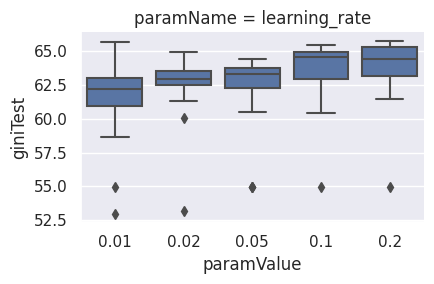

In [ ]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='learning_rate'],
              row="paramName",
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


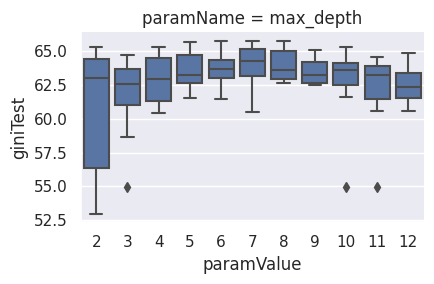

In [ ]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_depth'],
              row="paramName",
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

# Implementación de Modelos

In [ ]:
import pickle

In [ ]:
xgBoost

In [ ]:
objectToSave = xgBoost
filename = "./XGBoost.xgb"
pickle.dump(objectToSave, open(filename, 'wb'))
print("done")

done


In [ ]:
loaded_model

NameError: ignored

In [ ]:
filename = "./XGBoost.xgb"
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_model

In [ ]:
loaded_model.predict(xgb.DMatrix(X_test[features]))


array([0.09734891, 0.11592398, 0.09358091, ..., 0.0843445 , 0.1768896 ,
       0.09734891], dtype=float32)

---

# Gracias por completar este laboratorio!

---

